# Avocado Project

# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

• Date - The date of the observation

• AveragePrice - the average price of a single avocado

• type - conventional or organic

• year - the year

• Region - the city or region of the observation

• Total Volume - Total number of avocados sold

• 4046 - Total number of avocados with PLU 4046 sold

• 4225 - Total number of avocados with PLU 4225 sold

• 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

# Importing libraries

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we have imported all the nessary libraries 

# Import dataset

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [5]:
# Check top 5 rows

df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


top 5 rows of the dataset

In [4]:
# Check bottom 5 rows

df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


last 5 rows of the dataset

# Feature Engineering

In [6]:
# Lets check their datatype

df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are three types of data present in te dataset ['int64', 'object', 'float64']

In [7]:
# Lets change date column from object data type to datetime data type

df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# extract Month & day from date

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df.drop('Date',axis = 1, inplace = True)

In [10]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [11]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [12]:
df.shape

(1517, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   int64  
 11  region        1517 non-null   object 
 12  Month         1517 non-null   int64  
 13  Day           1517 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 166.0+ KB


# Checking for the null values

In [14]:
# Checking null values in the dataset

df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

no null values are present in the dataset

<AxesSubplot:>

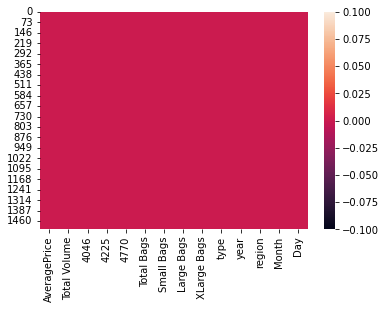

In [15]:
# visualize the null values in heatmap

sns.heatmap(df.isnull())

In [16]:
# Check columns in the dataset

df.columns.to_list()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Month',
 'Day']

list of all the columns present in the dataset

In [17]:
# Check data uniqueness in target variable

df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58])

In [18]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
# List of values in the target variable

df["AveragePrice"].value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64

In [21]:
# List of values in the target variable

df["region"].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [20]:
## Statistcal description of dataset

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Observation=


1. count for each column is same so there are no null value present in the dataset


2. mean is less than median for most of the column so we can say that skewness is present in the dataset.


3. There is a huge difference between 75th percentile and max value so we can say that outliers are present in the dataset.


4. we can also observe the count, mean, std., min., 25th, 50, 75th percentile and max value for each columns

# Seperating numerical and catagorical data columns

In [22]:
# for categorical columns

categorical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)

print(categorical_col)

['type', 'region']


In [23]:
#checking for numerical columns

numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# DATA VISUALIZATION

# Univariate analysis

2015    1270
2016     247
Name: year, dtype: int64


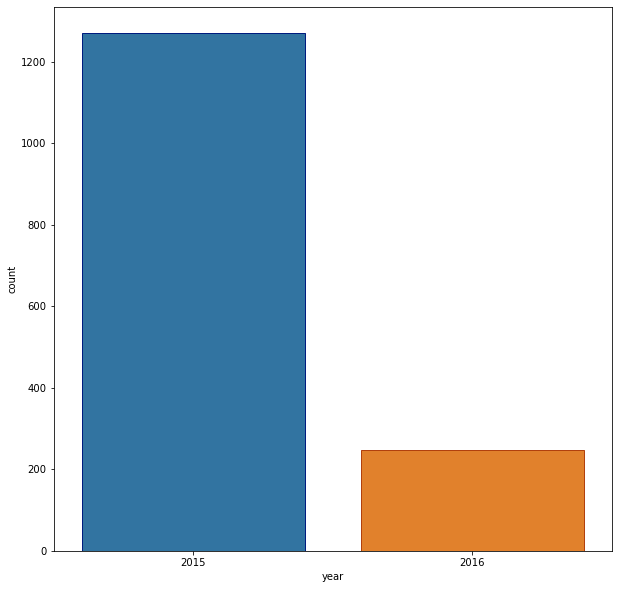

In [25]:
# count of year

print(df['year'].value_counts())

plt.figure(figsize = (10, 10))

sns.countplot(df['year'], edgecolor = sns.color_palette("dark", 5))

plt.show()

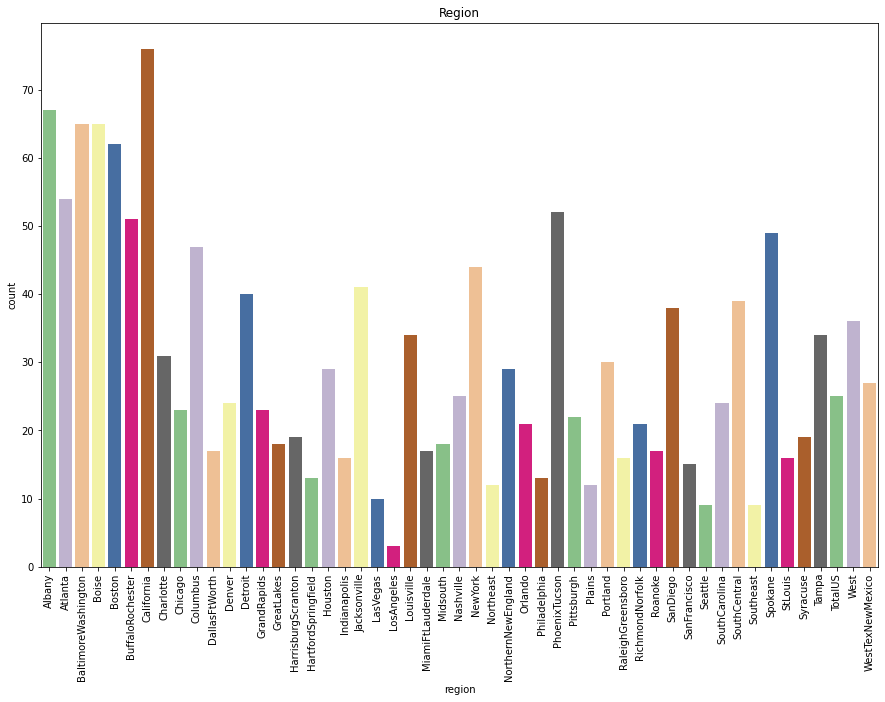

In [26]:
#Visualize the count of year

plt.figure(figsize = (15, 10))

sns.countplot(df['region'], palette = 'Accent')

plt.title('Region')

plt.xticks(rotation = 90)

plt.show()

# check data distribution

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64


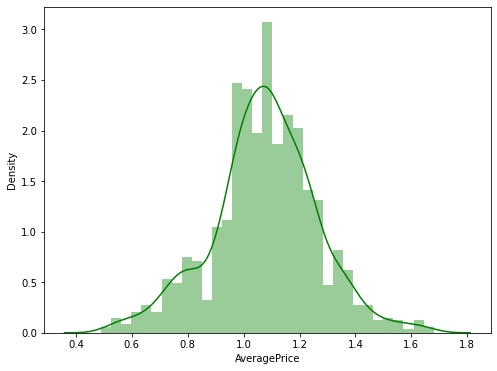

In [27]:
# Distribution plot for target variable AveragePrice

print(df["AveragePrice"].value_counts())

plt.figure(figsize = (8, 6))

sns.distplot(df["AveragePrice"], color = 'g')

plt.show()

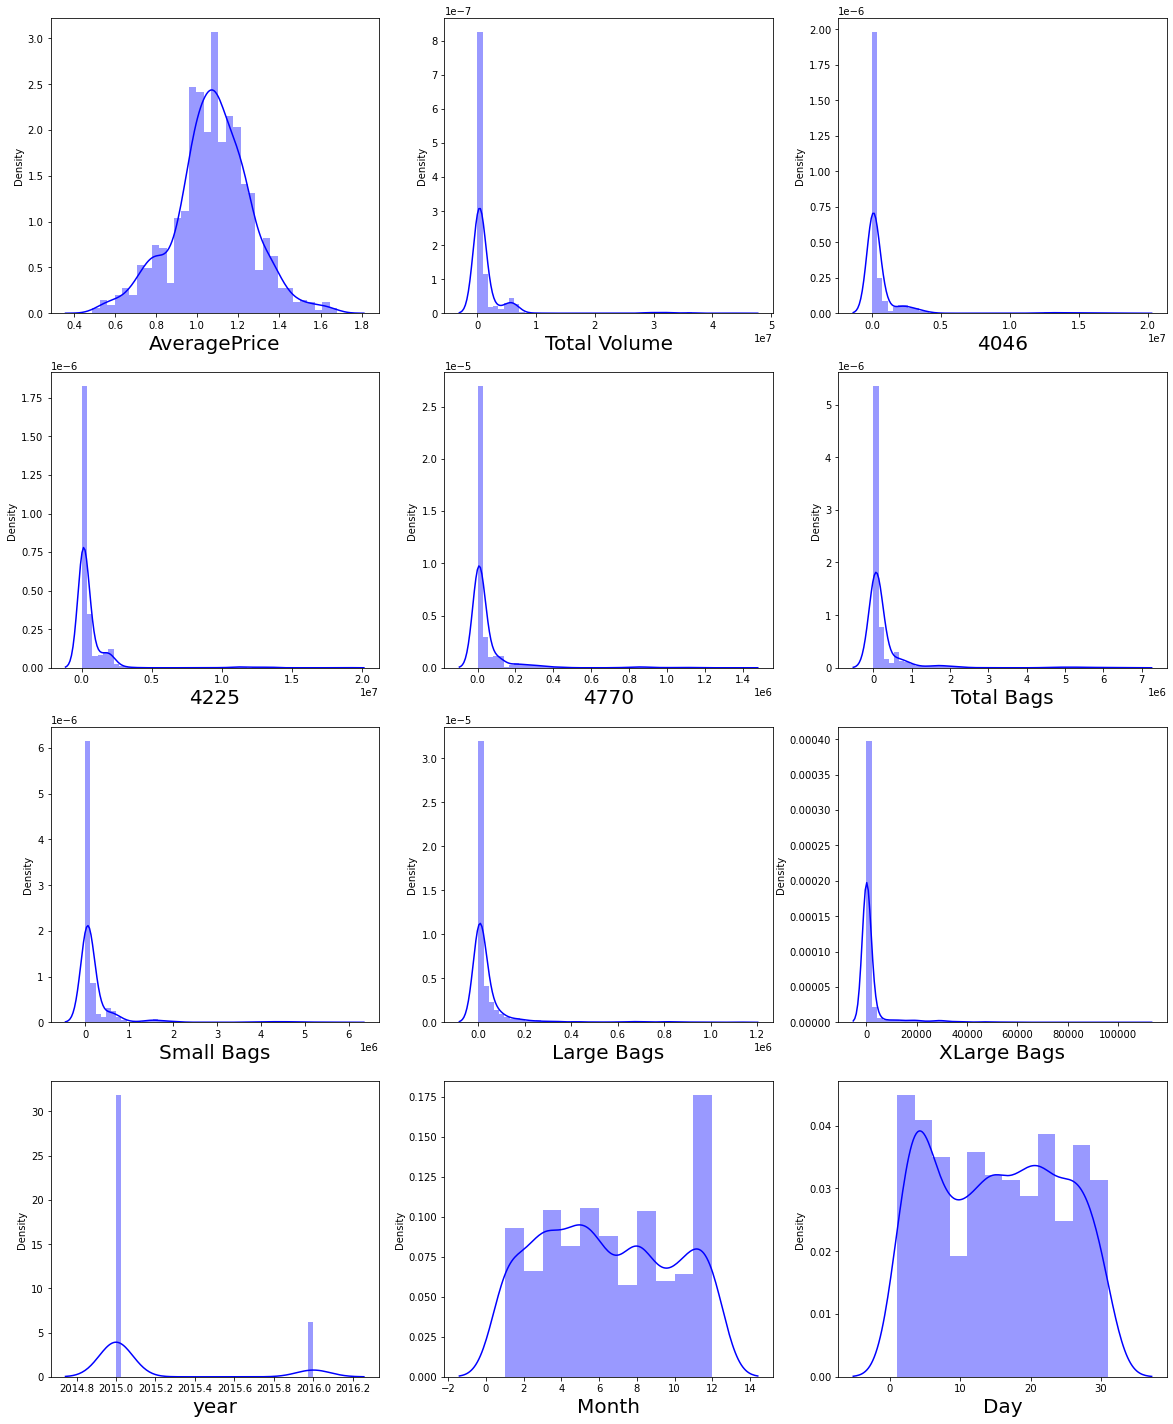

In [28]:
plt.figure(figsize=(20, 25), facecolor='white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 14:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column, fontsize = 20)
        plotnumber+=1
        
plt.show()

Text(0, 0.5, 'AveragePrice')

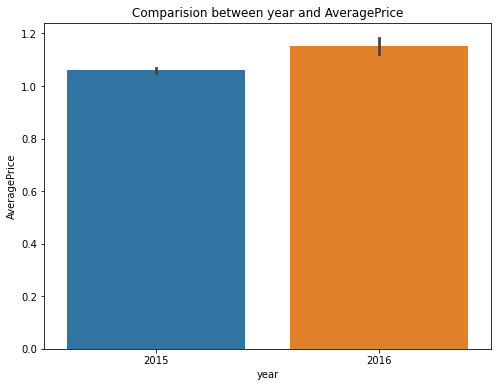

In [29]:
# Checking which year has maximum AveragePrice

plt.figure(figsize = [8, 6])

plt.title('Comparision between year and AveragePrice')

sns.barplot(df['year'], df['AveragePrice'], data = df);

plt.xlabel('year')

plt.ylabel('AveragePrice')

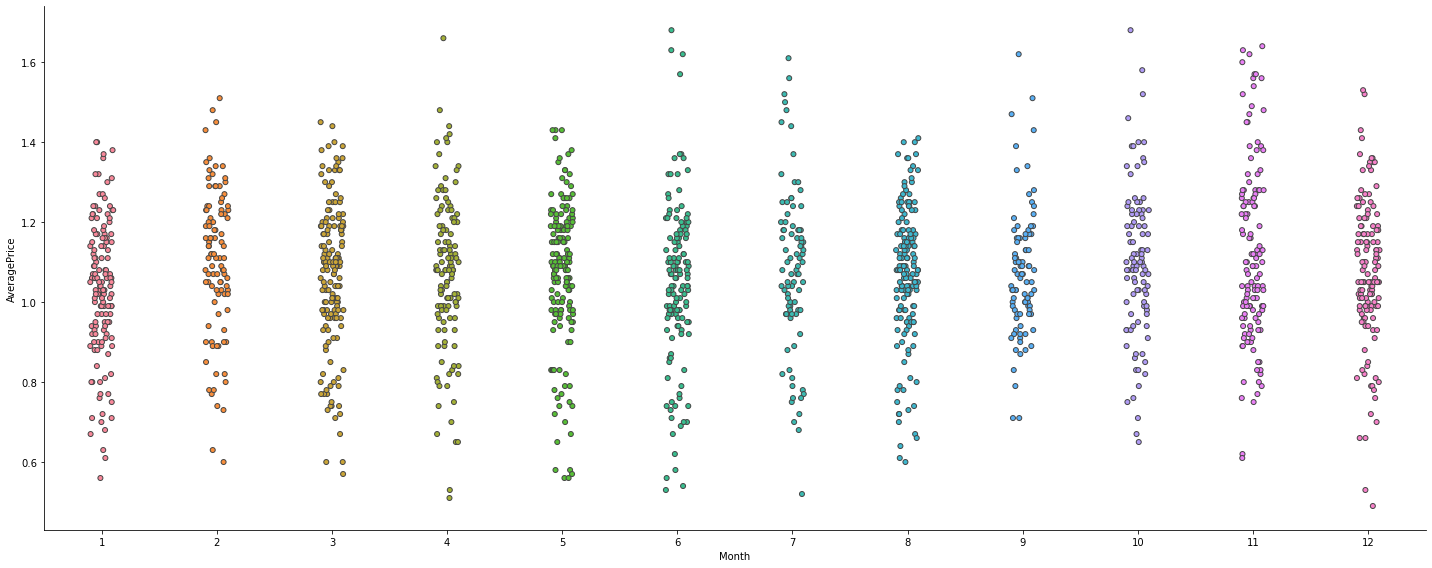

In [30]:
sns.catplot(x = 'Month', y = 'AveragePrice', kind = 'strip', data = df, height = 8, linewidth = 1, aspect = 2.5)

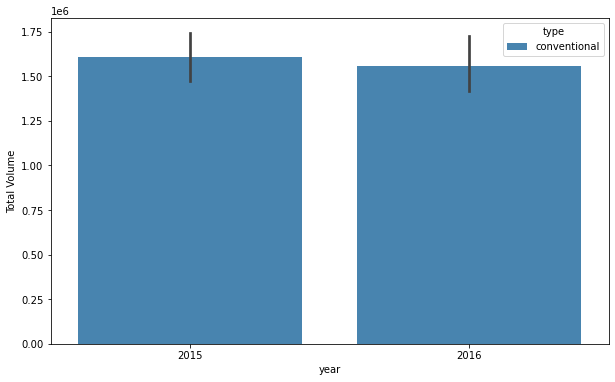

In [31]:
plt.figure(figsize = (10, 6))

sns.barplot(x = 'year', y = 'Total Volume', hue = 'type', data = df, palette = 'Blues_d', ci = 68)

plt.show()

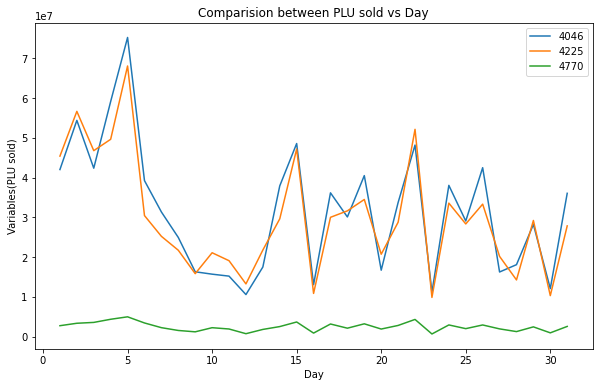

In [32]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()

variables.plot(kind = 'line', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between PLU sold vs Day')

plt.xlabel('Day')

plt.ylabel('Variables(PLU sold)')

plt.show()

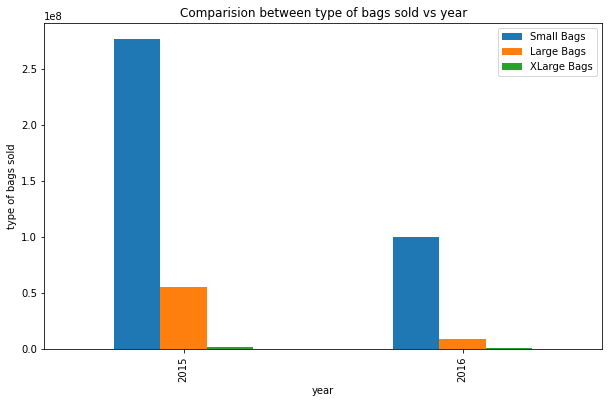

In [33]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.year).sum()

feature.plot(kind = 'bar', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('year')

plt.ylabel('type of bags sold')

plt.show()

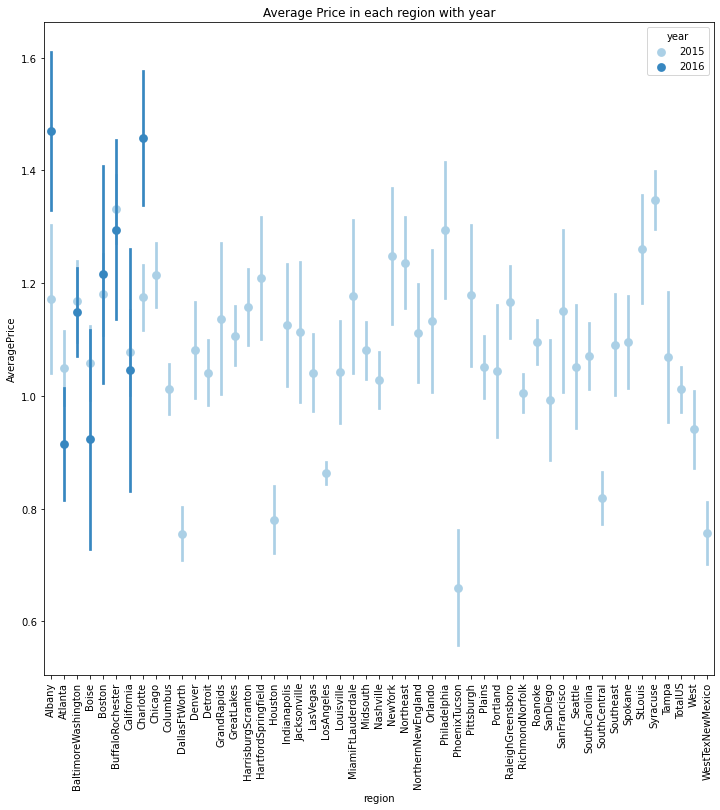

In [34]:
plt.figure(figsize = (12, 12))

plt.title('Average Price in each region with year')

sns.pointplot(x = 'region', y = 'AveragePrice', data = df, hue = 'year', join = False, palette = 'Blues', ci = 'sd')

plt.xticks(rotation = 90)

plt.show()

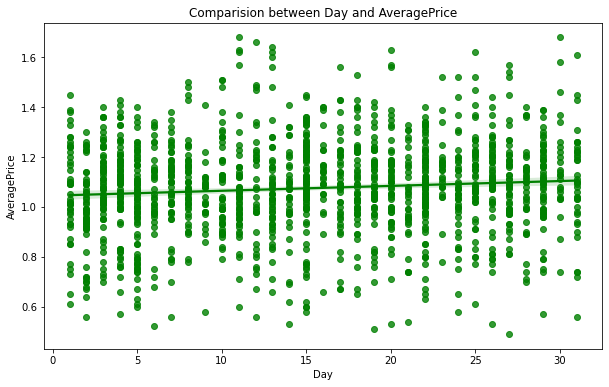

In [35]:
plt.figure(figsize = [10, 6])

plt.title('Comparision between Day and AveragePrice')

sns.regplot(df['Day'], df['AveragePrice'], color = 'g');

plt.show()

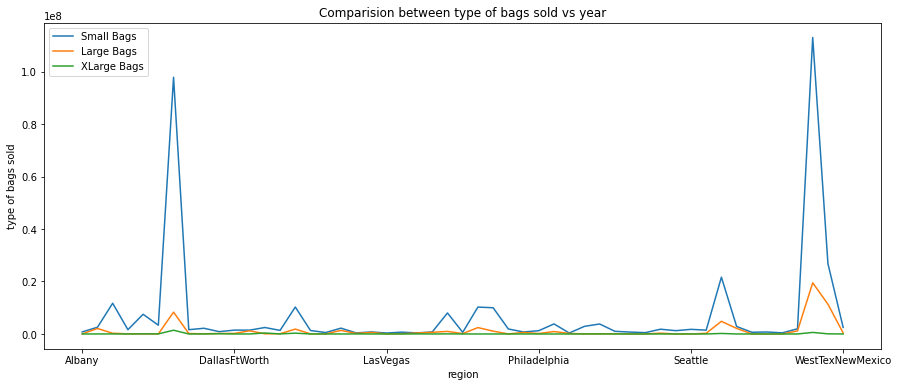

In [36]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.region).sum()

feature.plot(kind = 'line', fontsize = 10, figsize = (15, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('region')

plt.ylabel('type of bags sold')

plt.show()

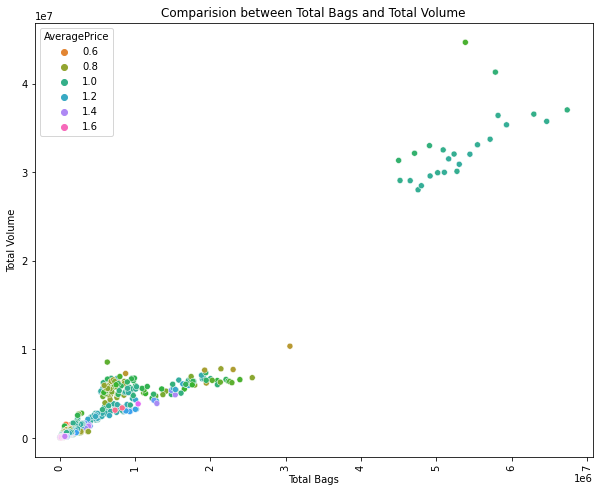

In [37]:
plt.figure(figsize = (10, 8))

plt.title('Comparision between Total Bags and Total Volume')

sns.scatterplot(x = 'Total Bags', y = 'Total Volume', hue = 'AveragePrice', data = df, palette = 'husl')

plt.xticks(rotation = 90)

plt.show()

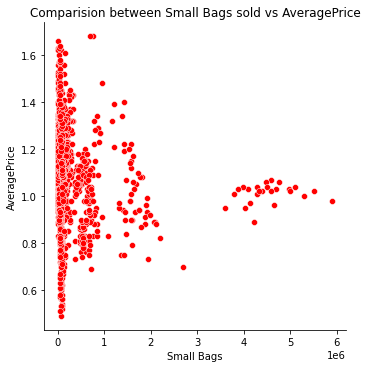

In [38]:
sns.relplot(df['Small Bags'], df['AveragePrice'], color = 'r');

plt.title('Comparision between Small Bags sold vs AveragePrice')

plt.xlabel('Small Bags')

plt.ylabel('AveragePrice')

plt.show()

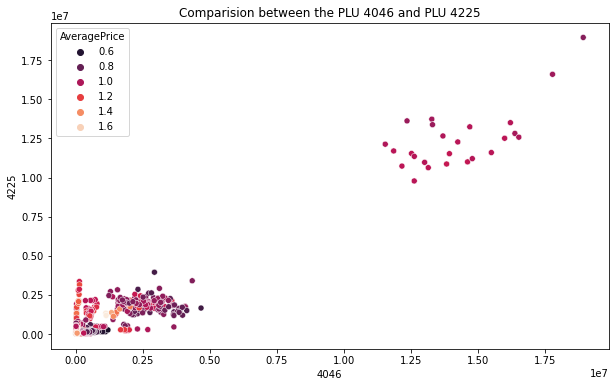

In [39]:
plt.figure(figsize = (10, 6))

plt.title('Comparision between the PLU 4046 and PLU 4225')

sns.scatterplot(df['4046'], df['4225'], hue = df['AveragePrice'], palette = 'rocket')

plt.show()

# Multivariate Analysis

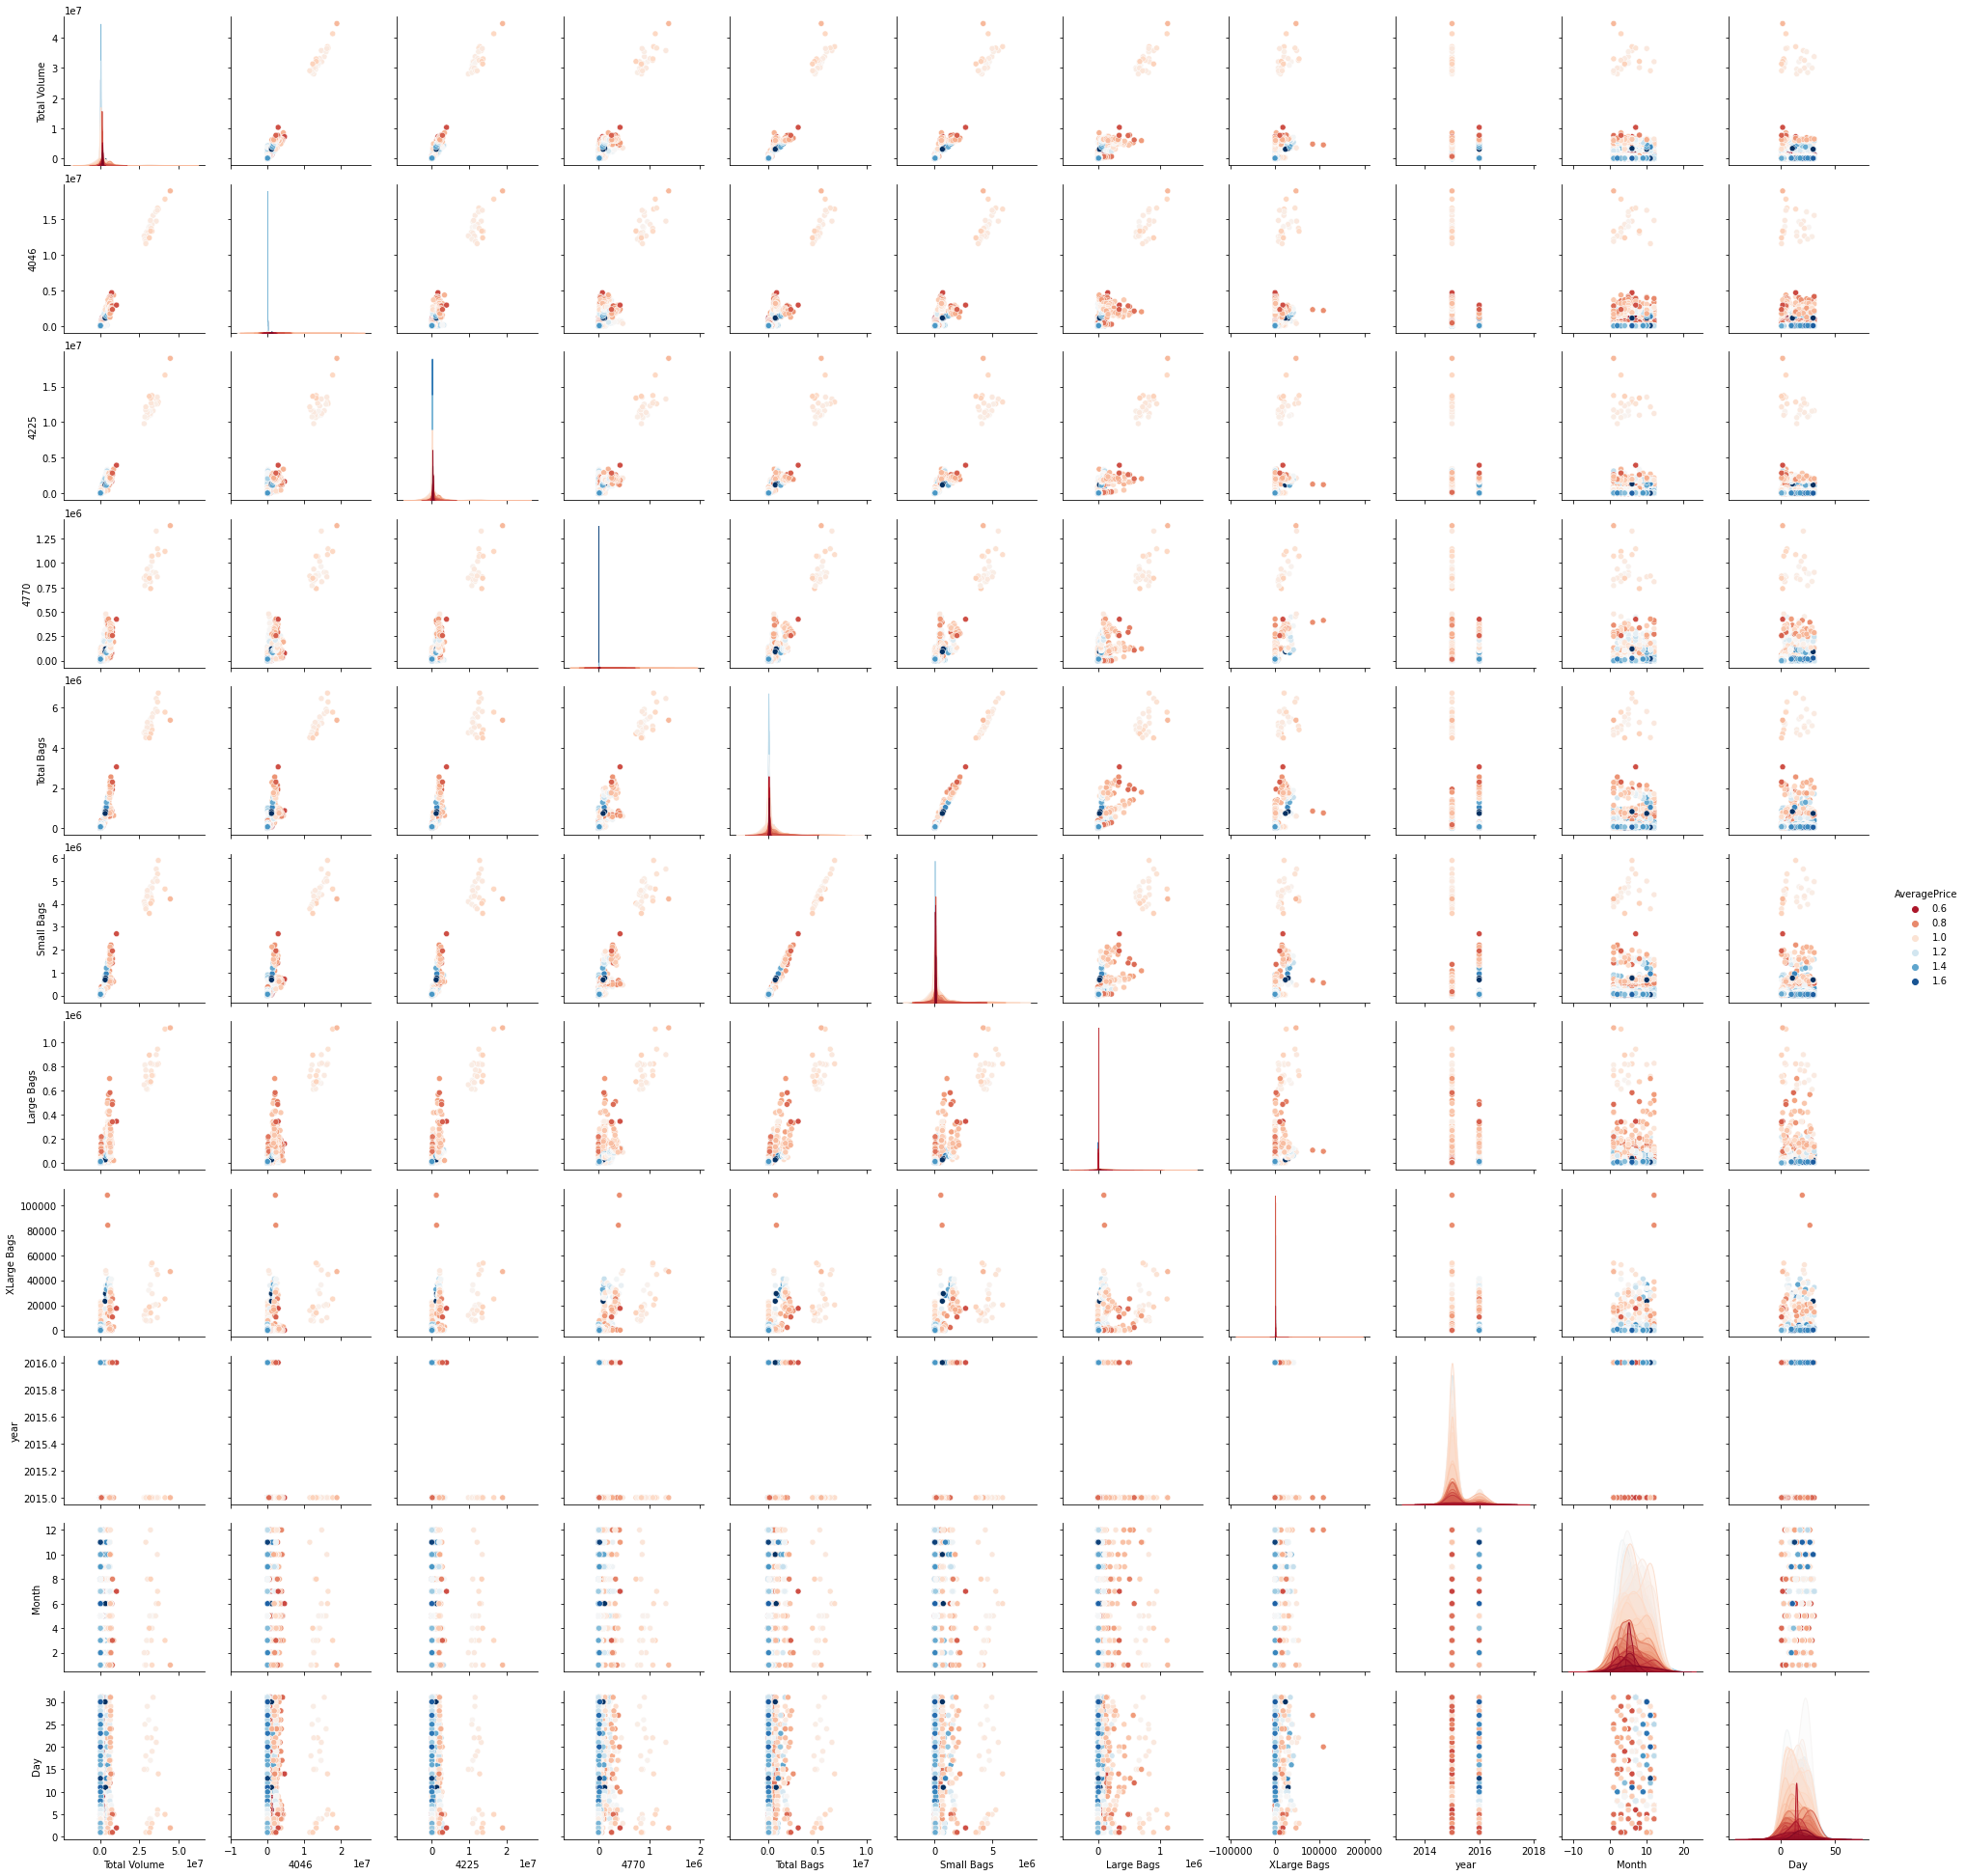

In [40]:
sns.pairplot(df, hue = 'AveragePrice', palette = 'RdBu')

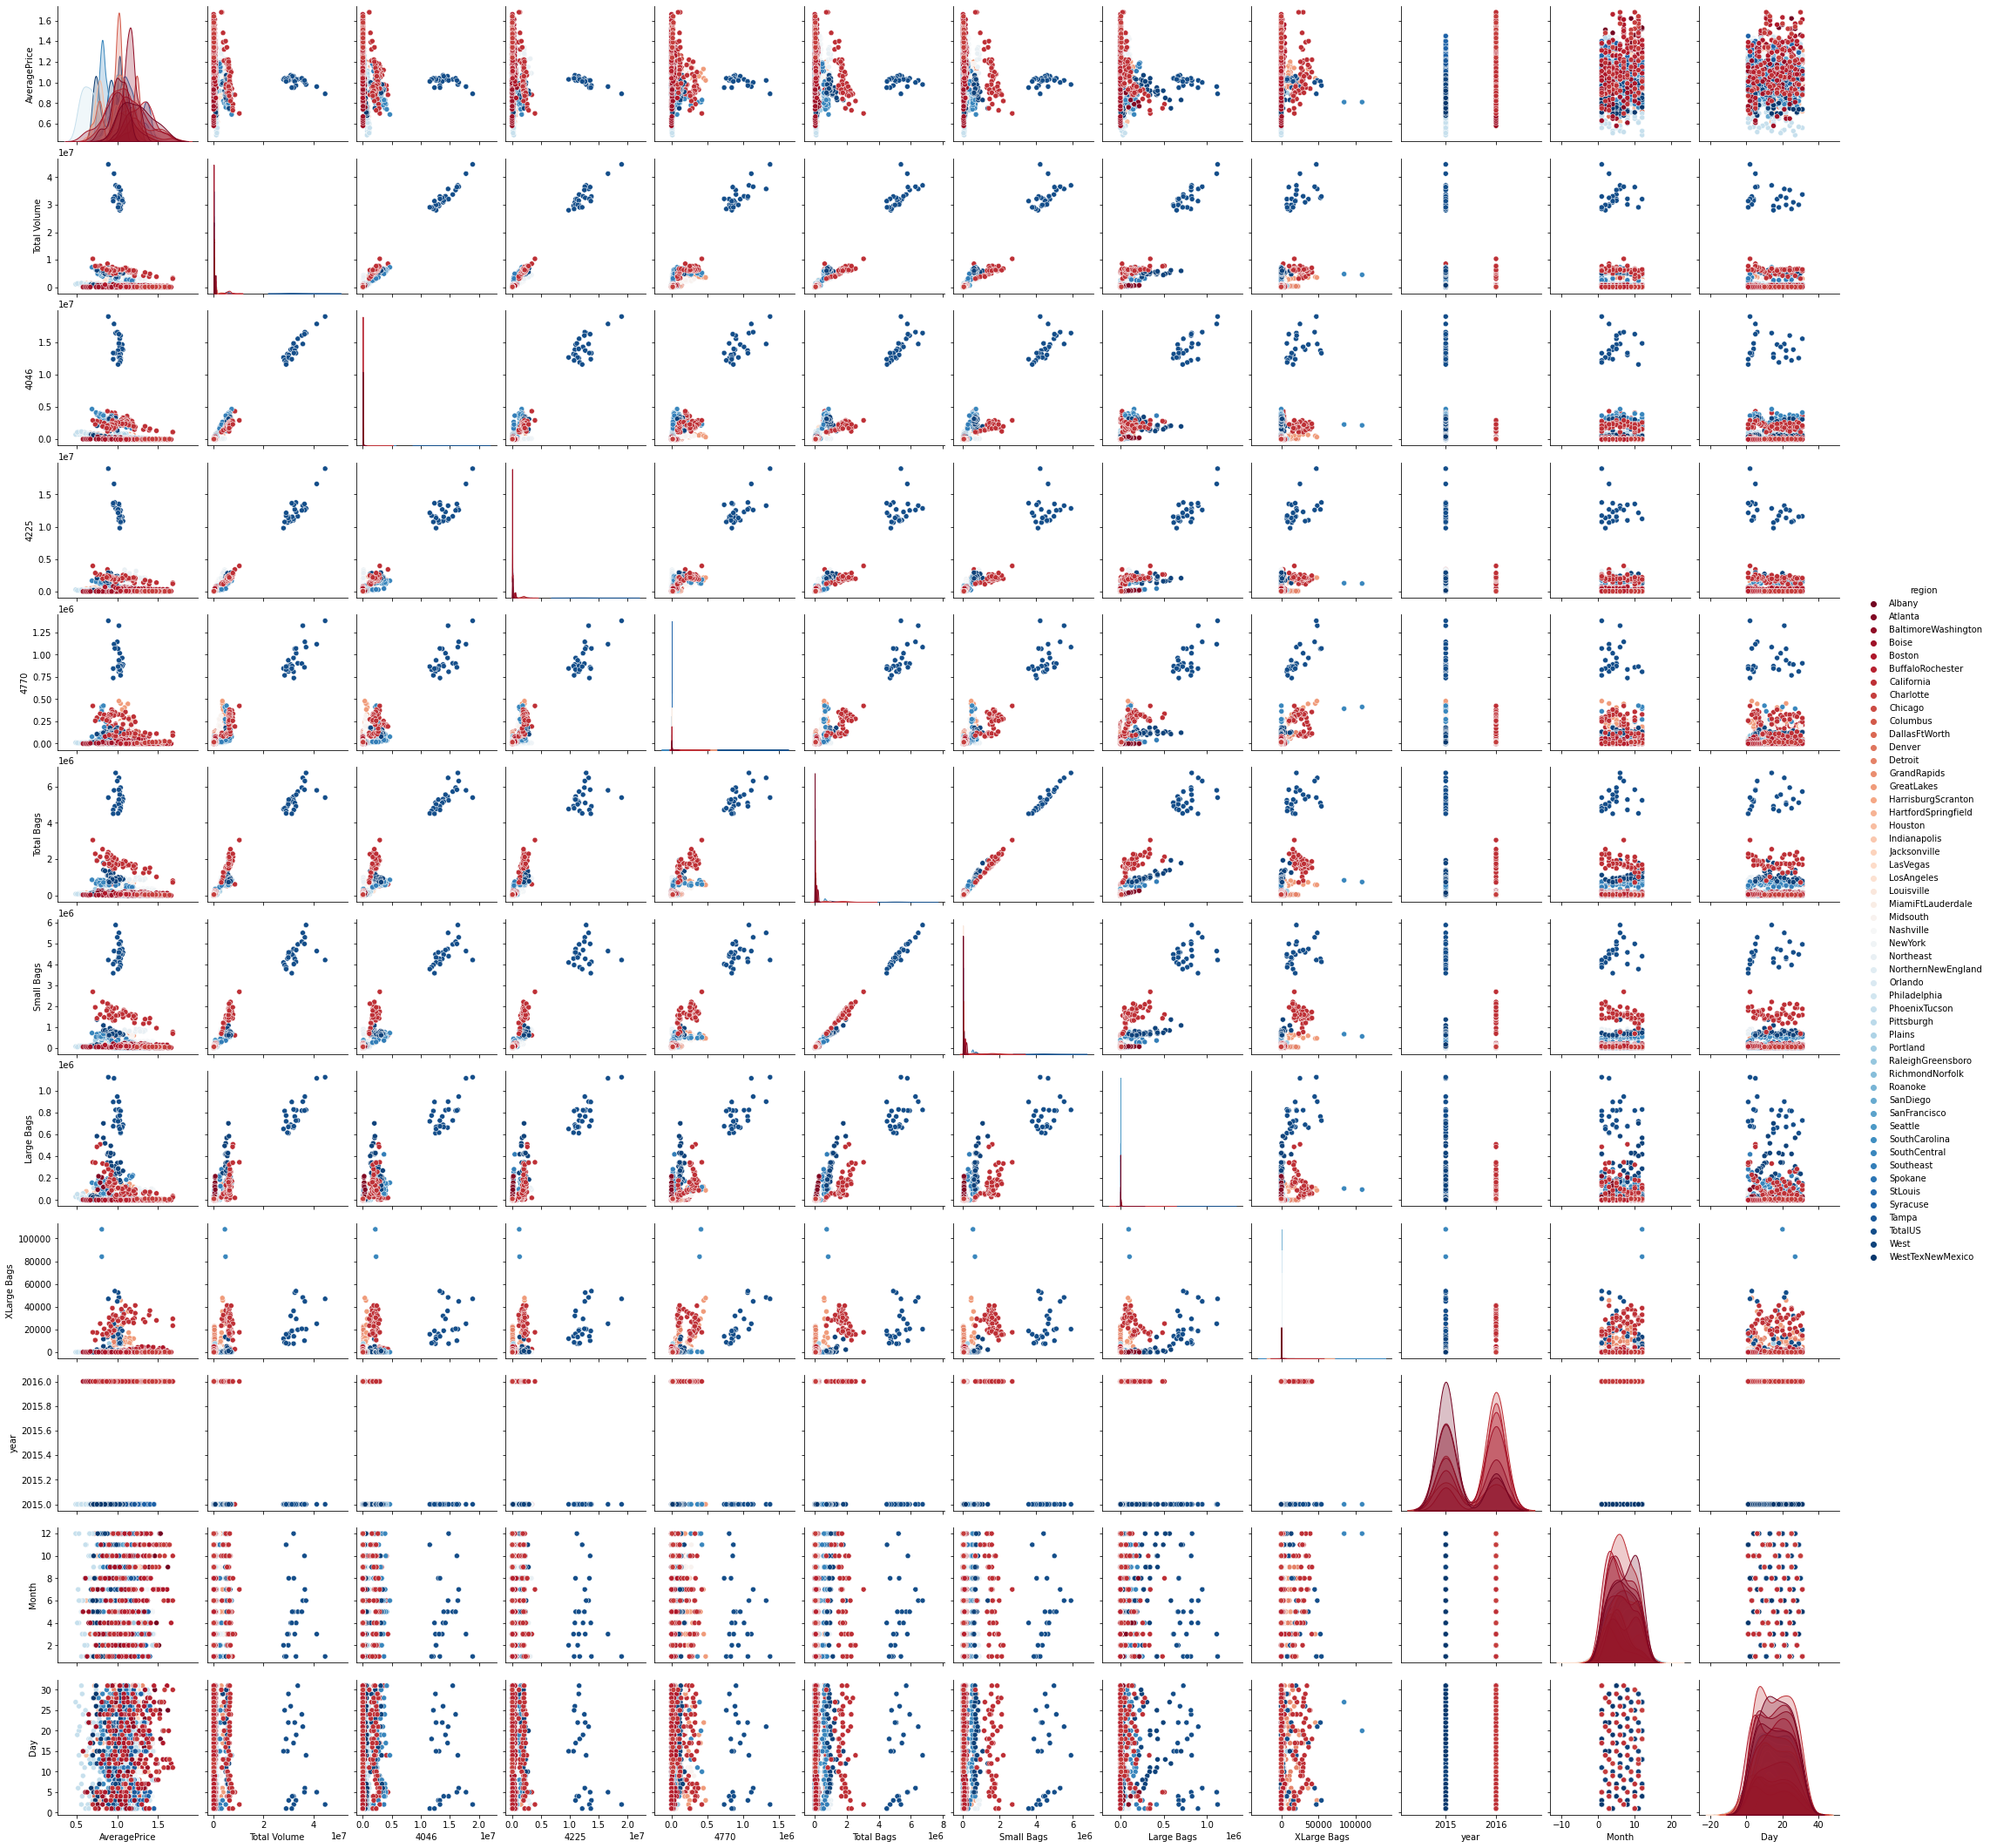

In [41]:
sns.pairplot(df, hue = 'region', palette = 'RdBu')

# Checking for the outliers

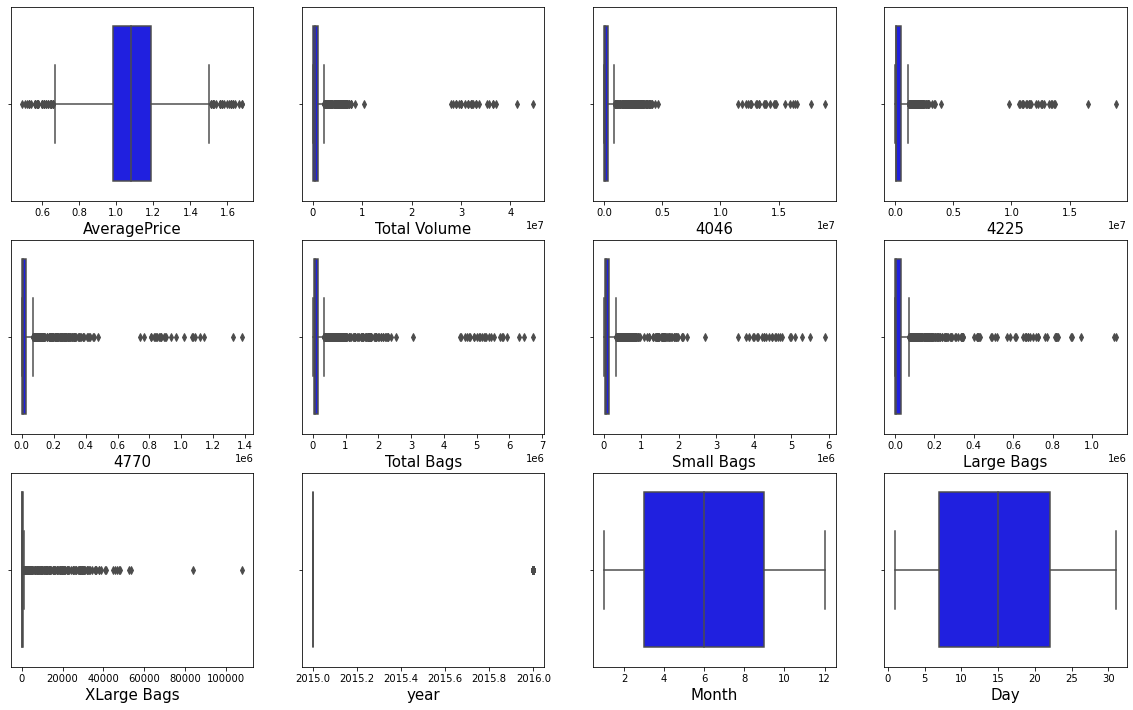

In [42]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']

plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6, 4, plotnumber)
        sns.boxplot(df[column], color = 'b')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1

plt.show()

By visualizing with boxplot we can say that outliers are present in the dataset. 

# Removing outliers

In [43]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_col]))

z_scores

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.350481,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727,0.441008,1.624154,1.310530
1,1.456397,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727,0.441008,1.624154,0.529537
2,0.767838,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727,0.441008,1.624154,0.251456
3,0.026531,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727,0.441008,0.104453,0.363027
4,1.085691,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727,0.441008,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.668229,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489,2.267532,1.047952,0.083255
1513,2.303724,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727,2.267532,0.759850,0.586168
1514,2.144850,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037,2.267532,1.256858,0.586168
1515,2.091892,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727,2.267532,0.759850,1.087389


In [44]:
threshold=3

print(np.where(z_scores>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [45]:
df_new=df[(z_scores<3).all(axis=1)]

df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [46]:
df.shape

(1517, 14)

In [47]:
df_new.shape

(1436, 14)

In [48]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

Dataloss is 2.5% after removing outliers

In [49]:
df=df_new

In [50]:
df.shape

(1436, 14)

# Checking skewness

In [51]:
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

Accpectable range for skewness is -0.5 to +0.5 so we can say that skewness is present in the dataset and we have to treat the skewness.

In [52]:
df['Total Volume']=np.cbrt(df['Total Volume'])
df['4046']=np.cbrt(df['4046'])
df['4225']=np.cbrt(df['4225'])
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['Large Bags']=np.cbrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df['year']=np.cbrt(df['year'])

In [53]:
df.skew()

AveragePrice   -0.184770
Total Volume    1.360283
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [54]:
import scipy
from scipy.stats import boxcox

In [55]:
df['Total Volume']=boxcox(df['Total Volume'],0)

In [56]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [57]:
df['4046']=boxcox(df['4046'],0)

In [58]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [59]:
df['Small Bags']=boxcox(df['Small Bags'],0)

In [60]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      0.420794
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [61]:
df['Total Bags']=boxcox(df['Total Bags'],0)

In [62]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [63]:
df['Large Bags']=np.sqrt(df['Large Bags'])

In [64]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [65]:
df['year']=np.sqrt(df['year'])

In [66]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     1.867443
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [67]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [68]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.865708
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [69]:
df['4770']=np.sqrt(df['4770'])

In [70]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.980401
4770            0.301946
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.865708
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [71]:
df['4225']=np.sqrt(df['4225'])

In [72]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.533261
4770            0.301946
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.865708
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

In [73]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

In [74]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462892
4046           -0.270542
4225            0.533261
4770            0.301946
Total Bags      0.378608
Small Bags      0.420794
Large Bags     -0.268003
XLarge Bags     0.419500
year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

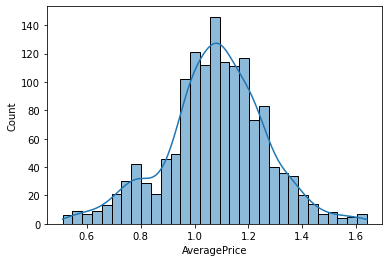

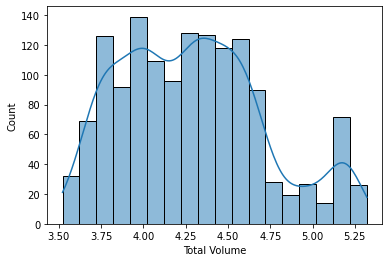

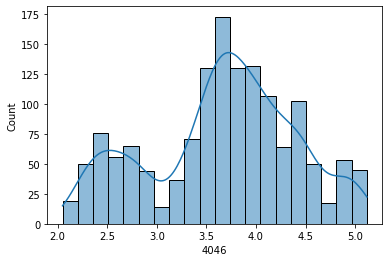

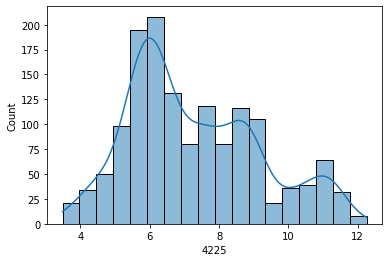

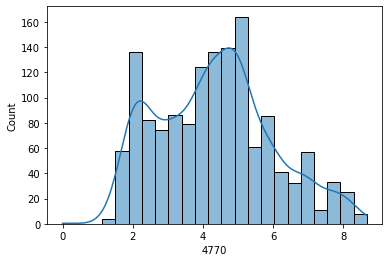

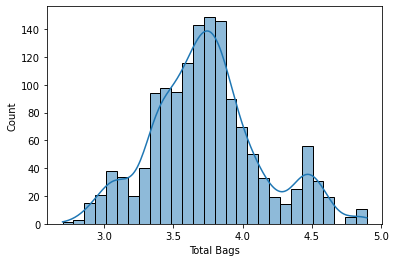

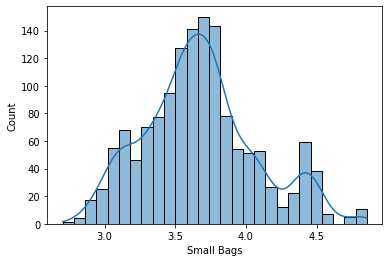

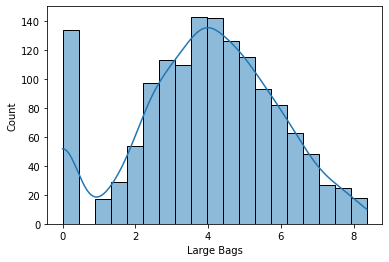

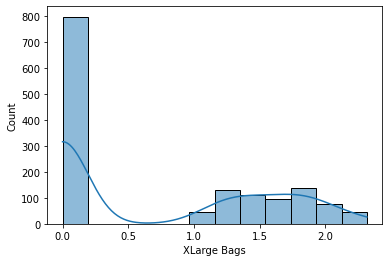

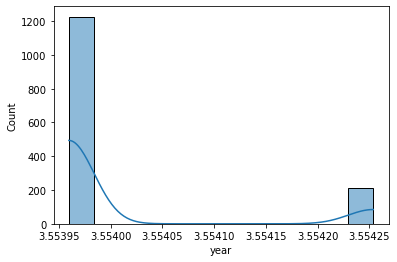

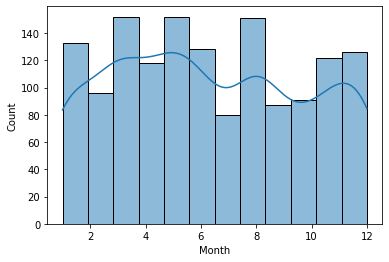

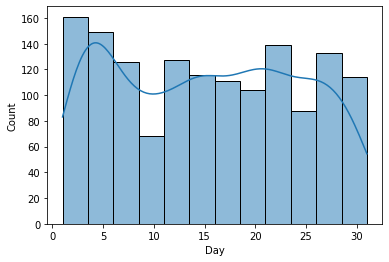

In [75]:
#checking for skewness by visualizing
for i in numerical_col:
    sns.histplot(df[i], kde= True)
    plt.show()

By visualizing with histplot we can say that skewness is removed from the dataset.

# Encode the catagorical data using label encoder.

In [76]:
categorical_col = ["type","region"]

In [79]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df[categorical_col] = df[categorical_col].apply(LE.fit_transform)

df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1512,0,7
1513,0,7
1514,0,7
1515,0,7


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1436 non-null   float64
 1   Total Volume  1436 non-null   float64
 2   4046          1436 non-null   float64
 3   4225          1436 non-null   float64
 4   4770          1436 non-null   float64
 5   Total Bags    1436 non-null   float64
 6   Small Bags    1436 non-null   float64
 7   Large Bags    1436 non-null   float64
 8   XLarge Bags   1436 non-null   float64
 9   type          1436 non-null   int32  
 10  year          1436 non-null   float64
 11  region        1436 non-null   int32  
 12  Month         1436 non-null   int64  
 13  Day           1436 non-null   int64  
dtypes: float64(10), int32(2), int64(2)
memory usage: 157.1 KB


In [81]:
# now we see the statistical summary of the dataset  
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.000000,1436.000000,1436.000000
mean,1.077180,4.283928,3.668415,7.268385,4.335252,3.738399,3.675506,3.938525,0.719871,0.0,3.554003,20.841922,6.334262,15.254178
std,0.188038,0.421014,0.733017,1.904668,1.632431,0.392382,0.397769,1.956931,0.831738,0.0,0.000104,15.723817,3.462246,8.982531
min,0.510000,3.521635,2.049290,3.482489,0.000000,2.701746,2.701746,0.000000,0.000000,0.0,3.553960,0.000000,1.000000,1.000000
25%,0.980000,3.954244,3.269484,5.851551,3.041156,3.481926,3.414874,2.758264,0.000000,0.0,3.553960,5.000000,3.000000,7.000000
50%,1.080000,4.272169,3.719573,6.810427,4.324324,3.720750,3.655079,4.024091,0.000000,0.0,3.553960,19.000000,6.000000,15.000000
75%,1.190000,4.547317,4.164742,8.615060,5.247778,3.924498,3.872616,5.276836,1.541726,0.0,3.553960,34.000000,9.000000,22.000000
max,1.640000,5.321164,5.118816,12.264412,8.676348,4.895861,4.856062,8.368183,2.316897,0.0,3.554254,49.000000,12.000000,31.000000


# Corelation between target and independent variables

In [83]:
corr = df.corr()

corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.352485,-0.543608,-0.126802,-0.255345,-0.193154,-0.146209,-0.240807,-0.075043,NaN,0.173229,-0.210825,0.066069,0.091823
Total Volume,-0.352485,1.000000,0.714432,0.886123,0.609262,0.916024,0.897250,0.602899,0.268376,NaN,-0.081343,0.155752,-0.089703,-0.051081
4046,-0.543608,0.714432,1.000000,0.378033,0.525803,0.569912,0.524759,0.518519,0.195377,NaN,-0.209595,0.309680,-0.082513,-0.038823
4225,-0.126802,0.886123,0.378033,1.000000,0.549009,0.833735,0.844281,0.468059,0.254728,NaN,-0.040163,0.075378,-0.053443,-0.043773
4770,-0.255345,0.609262,0.525803,0.549009,1.000000,0.552788,0.573964,0.315348,0.508099,NaN,-0.028012,-0.008085,-0.029949,0.006977
Total Bags,-0.193154,0.916024,0.569912,0.833735,0.552788,1.000000,0.979557,0.614147,0.328709,NaN,0.067249,0.117038,-0.077263,-0.033677
Small Bags,-0.146209,0.897250,0.524759,0.844281,0.573964,0.979557,1.000000,0.489507,0.315915,NaN,0.100334,0.103129,-0.081534,-0.025704
Large Bags,-0.240807,0.602899,0.518519,0.468059,0.315348,0.614147,0.489507,1.000000,0.191041,NaN,-0.161902,0.101513,-0.046611,-0.035660
XLarge Bags,-0.075043,0.268376,0.195377,0.254728,0.508099,0.328709,0.315915,0.191041,1.000000,NaN,0.102576,-0.199141,0.063851,0.033055
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

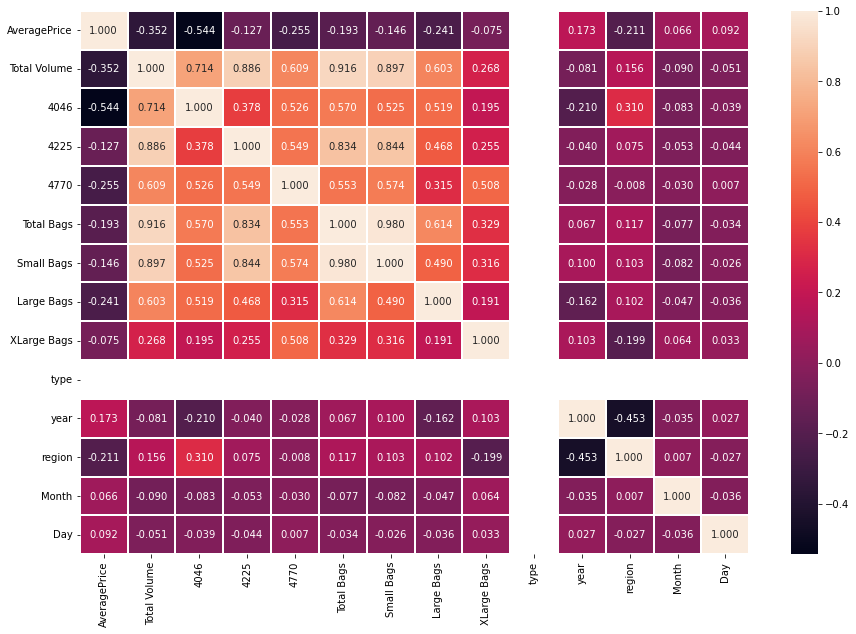

In [84]:
plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), linewidths = 0.2, fmt = '0.3f', annot = True)

plt.yticks(rotation = 0)

# using VIF for solving Multi colinearity problem.

In [85]:
corr['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
year            0.173229
Day             0.091823
Month           0.066069
XLarge Bags    -0.075043
4225           -0.126802
Small Bags     -0.146209
Total Bags     -0.193154
region         -0.210825
Large Bags     -0.240807
4770           -0.255345
Total Volume   -0.352485
4046           -0.543608
type                 NaN
Name: AveragePrice, dtype: float64

# Visualization of corelation between label and features.

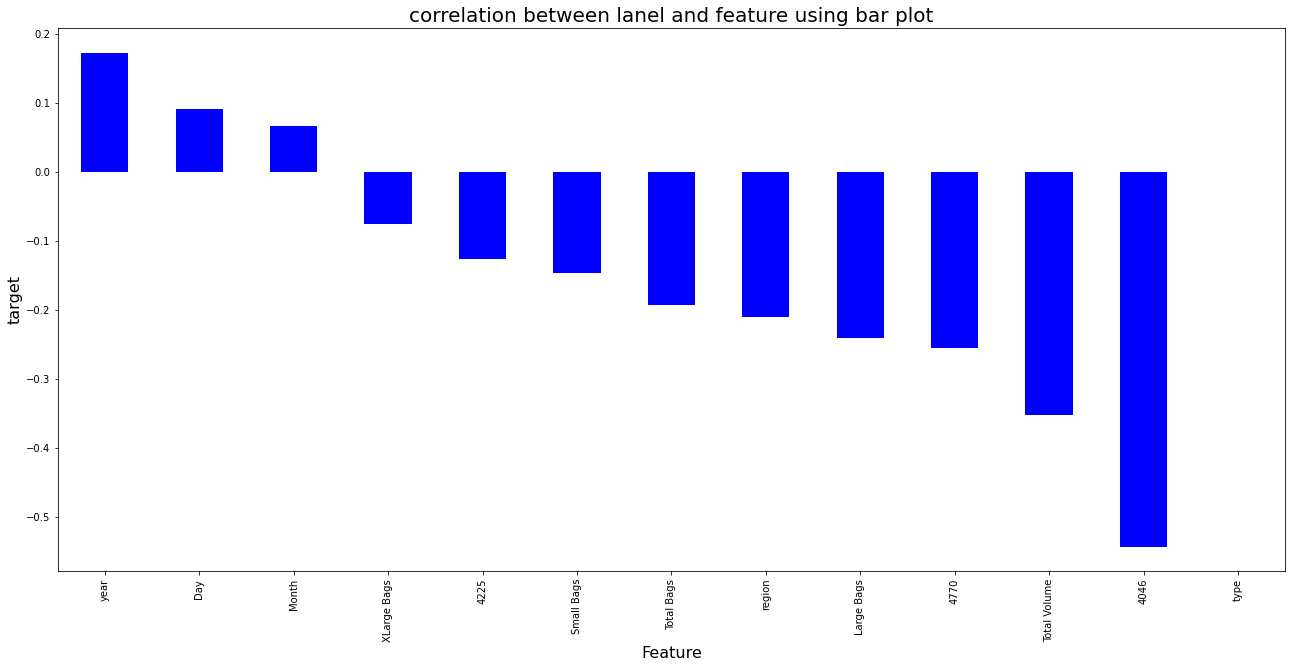

In [87]:
plt.figure(figsize = (22, 10))

df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind = 'bar', color = 'b')

plt.xlabel('Feature',fontsize = 16)

plt.ylabel('target',fontsize = 16)

plt.title('correlation between lanel and feature using bar plot', fontsize = 20)

plt.show()

In [88]:
df.drop('Day', axis = 1, inplace = True)

# Regression model

In [90]:
# seperate features in x & y labels

x = df.drop('AveragePrice', axis = 1)

y = df['AveragePrice']

In [91]:
x.shape

(1436, 12)

In [92]:
y.shape

(1436,)

In [93]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,3.690110,2.314612,6.156579,1.907426,3.023573,3.019979,2.129486,0.0,0,3.55396,0,12
1,3.637616,2.171215,5.955965,1.969316,3.053211,3.049774,2.145326,0.0,0,3.55396,0,12
2,3.893435,2.225988,6.913061,2.252173,3.001734,2.997486,2.165565,0.0,0,3.55396,0,12
3,3.759035,2.343914,6.449584,2.042378,2.889178,2.881416,2.261454,0.0,0,3.55396,0,6
4,3.613452,2.282484,5.938031,2.057118,2.909904,2.899074,2.413593,0.0,0,3.55396,0,11


# Standard scalarization

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-1.410939,-1.847534,-0.583930,-1.487763,-1.822398,-1.648581,-0.924748,-0.865803,0.0,-0.413870,-1.325962,1.637005
1,-1.535665,-2.043228,-0.689295,-1.449838,-1.746838,-1.573650,-0.916651,-0.865803,0.0,-0.413870,-1.325962,1.637005
2,-0.927829,-1.968479,-0.186619,-1.276504,-1.878074,-1.705149,-0.906306,-0.865803,0.0,-0.413870,-1.325962,1.637005
3,-1.247170,-1.807546,-0.430042,-1.405065,-2.165026,-1.997053,-0.857289,-0.865803,0.0,-0.413870,-1.325962,-0.096578
4,-1.593080,-1.891379,-0.698714,-1.396033,-2.112188,-1.952646,-0.779518,-0.865803,0.0,-0.413870,-1.325962,1.348074
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.548519,-0.020561,-0.565281,0.466723,-0.189369,-0.193271,0.373215,1.033340,0.0,2.416215,-0.880622,1.059144
1432,-0.602661,-0.149544,-0.606747,0.520415,-0.135583,-0.097933,0.300340,-0.865803,0.0,2.416215,-0.880622,0.770213
1433,-0.601884,-0.118707,-0.599572,0.442663,-0.147547,-0.119219,0.284905,1.238956,0.0,2.416215,-0.880622,-1.252300
1434,-0.555666,-0.048427,-0.592511,0.465642,-0.127153,-0.083511,0.285837,-0.865803,0.0,2.416215,-0.880622,0.770213


In [97]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,39.009210,Total Volume
1,7.886307,4046
2,14.806427,4225
3,2.424538,4770
4,72.985537,Total Bags
5,57.134638,Small Bags
6,3.537291,Large Bags
7,1.586598,XLarge Bags
8,NaN,type
9,1.567897,year


In [98]:
# Drop column Total volume

x.drop('Total Volume', axis = 1, inplace = True)

In [99]:
# check again the VIF values

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,2.318440,4046
1,4.288643,4225
2,2.407439,4770
3,66.584536,Total Bags
4,56.789007,Small Bags
5,3.513569,Large Bags
6,1.542985,XLarge Bags
7,NaN,type
8,1.543965,year
9,1.501505,region


In [100]:
# Still 2 columns have VIF more than 10 so lets drop another column Total bags

x.drop('Total Bags', axis = 1, inplace = True)

In [101]:
# check VIF values again

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,2.244092,4046
1,4.268628,4225
2,2.248896,4770
3,5.147331,Small Bags
4,1.631436,Large Bags
5,1.472329,XLarge Bags
6,NaN,type
7,1.531635,year
8,1.495206,region
9,1.023371,Month


Now the VIF values have reduced within 10, this means Multicolinearity has been solved, lets start building model.

# Finding Best Random State

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN

In [106]:
maxAcc = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
print('Maximum R2 score is ', maxAcc,' on Random_state ', maxRS)

Maximum R2 score is  0.7480472666150687  on Random_state  63


we got a max R2 score of 74.80% at Random state of 63

In [107]:
# create Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=63)

# Linear regression with Cross_validation score

In [110]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)

# predict
predLR = LR.predict(x_test)
print('R2_score:', r2_score(y_test, predLR))
print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking Cross_Validation score for Linear Regression
print('Cross_Validaton_Score', cross_val_score(LR, x, y, cv = 5).mean())

R2_score: 0.33964053416046924
MAE: 0.12112641464685578
MSE: 0.024685847979216257
RMSE: 0.1571173064280834
Cross_Validaton_Score -0.10497969591415764


# Random Forest Regressor

In [111]:
# Checking R2 score for  Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

# predict
pred_RFR = RFR.predict(x_test)
print('R2_Score:', r2_score(y_test, pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking Cross_Validation score for Random Forest Regression
print('Cross_Validaton_Score', cross_val_score(RFR, x, y, cv = 5).mean())

R2_Score: 0.8287118338681344
MAE: 0.0585512761020882
MSE: 0.00640316955916474
RMSE: 0.08001980729272434
Cross_Validaton_Score 0.1522264976014026


# KNeighbors Regressor

In [112]:

# Checking R2 score for KNN Regressor
knn = KNN()

knn.fit(x_train, y_train)

# predict

predknn = knn.predict(x_test)

print('R2_Score:',r2_score(y_test, predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking Cross_Validaton score for KNN
print('Cross_Validaton_Score', cross_val_score(knn, x, y, cv = 5).mean())

R2_Score: 0.7480472666150687
MAE: 0.07547563805104408
MSE: 0.009418607888631091
RMSE: 0.0970495125625631
Cross_Validaton_Score -0.35112210877222755


# Gradient Boosting Regressor

In [113]:
# Checking R2 score for  GradientBoosting Regressor

GB = GradientBoostingRegressor()

GB.fit(x_train, y_train)

# predict

predGB = GB.predict(x_test)

print('R2_Score:',metrics.r2_score(y_test,predGB))

print('MAE:',metrics.mean_absolute_error(y_test, predGB))

print('MSE:',metrics.mean_squared_error(y_test, predGB))

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking Cross_Validaton score for GradientBoosting Regressor
print('Cross_Validaton_Score', cross_val_score(GB, x, y, cv = 5).mean())

R2_Score: 0.7540507244247263
MAE: 0.07347635610190174
MSE: 0.009194183988459633
RMSE:  0.09588630761719649
Cross_Validaton_Score 0.10989150156709986


# SVM regressor

In [114]:
# Checking R2 score for Support Vector Machine Regressor

svr = SVR()

svr.fit(x_train, y_train)

# predict

predsvr = svr.predict(x_test)

print('R2_Score:', r2_score(y_test, predsvr))

print('MAE:', metrics.mean_absolute_error(y_test, predsvr))

print('MSE:', metrics.mean_squared_error(y_test, predsvr))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 

print('Cross_Validaton_Score', cross_val_score(svr, x, y, cv = 5).mean())

R2_Score: 0.7485285872131362
MAE: 0.07567133195526754
MSE: 0.009400614950348524
RMSE: 0.09695676846073473
Cross_Validaton_Score 0.12192401977659759


# Here we can conclude that Random Forest Regressor is best fit model for our results.

Because Random forest regressor is showing r2 score of 82% highest among all the other models and cross val score 0.1522264976014026​ so we selectRandom Forest Classifier as our final model  

# Hyper Parameter Tuning

In [119]:
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [120]:
GCV = GridSearchCV(RandomForestRegressor(), parameter, cv = 5)

In [121]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [122]:
GCV.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [126]:
MODEL_FINAL = RandomForestRegressor (max_depth=None, min_samples_split=2, n_estimators=300)

MODEL_FINAL.fit(x_train, y_train)

pred = MODEL_FINAL.predict(x_test)

print('R2_Score:',r2_score(y_test, pred) * 100)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 82.97495247069081
mean_squared_error: 0.0063643781438515274
mean_absolute_error: 0.057963650425367365
RMSE value: 0.0797770527398169


# Saving model

In [127]:
# Save the model as .pkl

joblib.dump(MODEL_FINAL, 'Avocado.pkl')

['Avocado.pkl']

# Predicting Saved Model

In [128]:
model=joblib.load('Avocado.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([1.0731    , 1.01846667, 1.2112    , 1.01316667, 1.02373333,
       1.11313333, 1.18786667, 1.16606667, 1.0124    , 1.06926667,
       1.42226667, 1.0868    , 1.15296667, 1.108     , 1.0799    ,
       1.09146667, 0.61886667, 1.02383333, 1.0896    , 1.08266667,
       1.1931    , 1.12073333, 1.14583333, 1.26776667, 1.047     ,
       1.20076667, 1.06913333, 0.64406667, 1.00763333, 1.16213333,
       0.85206667, 1.14256667, 0.98463333, 1.1751    , 1.17403333,
       1.19586667, 1.28586667, 1.23956667, 1.19793333, 0.7967    ,
       1.00916667, 1.13986667, 1.2657    , 1.19123333, 1.24033333,
       1.11516667, 1.24366667, 1.1787    , 1.13066667, 1.07243333,
       1.15566667, 1.08903333, 0.57416667, 1.00786667, 1.17363333,
       1.2042    , 0.83486667, 1.09843333, 1.19803333, 0.876     ,
       1.0066    , 0.9988    , 1.06503333, 1.19853333, 1.2587    ,
       1.04896667, 1.38233333, 1.1636    , 1.19523333, 1.10923333,
       1.05006667, 0.99436667, 1.4414    , 1.47146667, 1.042  

In [129]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
Predicted,1.0731,1.018467,1.2112,1.013167,1.023733,1.113133,1.187867,1.166067,1.0124,1.069267,...,1.072933,1.0859,1.090667,1.066033,1.121067,1.3316,1.015267,1.0199,0.956667,1.036467
Original,1.0500,0.980000,1.2700,0.990000,1.110000,1.090000,1.170000,1.210000,0.9700,1.080000,...,0.920000,1.0500,0.980000,0.990000,1.060000,1.2300,0.930000,0.9900,0.910000,1.080000


Here we can see that the predicted values and original values are almost similiar so our model is working fine.

# Regional Classification model Prediction

In [132]:
df.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,3.690110,2.314612,6.156579,1.907426,3.023573,3.019979,2.129486,0.0,0,3.55396,0,12
1,1.35,3.637616,2.171215,5.955965,1.969316,3.053211,3.049774,2.145326,0.0,0,3.55396,0,12
2,0.93,3.893435,2.225988,6.913061,2.252173,3.001734,2.997486,2.165565,0.0,0,3.55396,0,12
3,1.08,3.759035,2.343914,6.449584,2.042378,2.889178,2.881416,2.261454,0.0,0,3.55396,0,6
4,1.28,3.613452,2.282484,5.938031,2.057118,2.909904,2.899074,2.413593,0.0,0,3.55396,0,11


In [135]:
 #splitting the values to x & y for training and testing purpose

x_r = df.drop(columns = ['region'])

y_r = df[['region']]

print(x_r.shape)

print(y_r.shape)

(1436, 12)
(1436, 1)


# Data Normalization

In [137]:
sc = StandardScaler()

sc.fit_transform(x_r)

x_c = pd.DataFrame(x_r, columns = x_r.columns)

# Test Train Split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x_r, y_r, test_size = 0.30 ,random_state = 49)

# Logistic Regression for Region

In [140]:
LR = LogisticRegression()

LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

0.7958236658932715
[[24  0  0 ...  0  0  0]
 [ 0  7  0 ...  3  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  1  0 ...  7  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.58      0.47      0.52        15
           2       0.78      0.95      0.86        22
           3       1.00      0.92      0.96        24
           4       0.75      0.83      0.79        18
           5       0.88      0.82      0.85        17
           6       0.69      0.82      0.75        11
           7       0.80      0.44      0.57         9
           8       1.00      0.88      0.93         8
           9       0.81      1.00      0.90        13
          10       1.00      0.83      0.91         6
          11       1.00      0.75      0.86         8
          12       1.00      1.00      1.00        17
          13       0.67      1.00      0.80         4
          14  

# Decision tree Classifier

In [141]:
DTC = DecisionTreeClassifier()

DTC.fit(x_train, y_train)

predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))

print(confusion_matrix(y_test, predDTC))

print(classification_report(y_test, predDTC))

0.8584686774941995
[[20  0  0 ...  0  0  0]
 [ 0 12  0 ...  2  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  1  0 ...  7  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.80      0.80      0.80        15
           2       0.95      0.95      0.95        22
           3       1.00      0.75      0.86        24
           4       1.00      0.89      0.94        18
           5       1.00      0.88      0.94        17
           6       1.00      0.91      0.95        11
           7       1.00      0.89      0.94         9
           8       0.86      0.75      0.80         8
           9       0.80      0.92      0.86        13
          10       1.00      0.83      0.91         6
          11       1.00      1.00      1.00         8
          12       0.89      0.94      0.91        17
          13       1.00      1.00      1.00         4
          14  

# SVM classifier

In [142]:
svc = SVC()

svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))

print(confusion_matrix(y_test, predsvc))

print(classification_report(y_test, predsvc))

0.5452436194895591
[[25  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  8  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        25
           1       0.34      0.73      0.47        15
           2       0.48      1.00      0.65        22
           3       0.95      0.79      0.86        24
           4       0.50      0.89      0.64        18
           5       0.65      0.76      0.70        17
           6       0.57      0.73      0.64        11
           7       0.75      0.67      0.71         9
           8       0.00      0.00      0.00         8
           9       0.52      1.00      0.68        13
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       1.00      0.71      0.83        17
          13       0.43      0.75      0.55         4
          14  

# Gradient Boosting Classifier

In [143]:
GB = GradientBoostingClassifier()

GB.fit(x_train, y_train)

predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))

print(confusion_matrix(y_test, predGB))

print(classification_report(y_test, predGB))

0.8723897911832946
[[22  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.76      0.87      0.81        15
           2       1.00      0.91      0.95        22
           3       1.00      1.00      1.00        24
           4       0.94      0.94      0.94        18
           5       0.94      0.94      0.94        17
           6       1.00      0.91      0.95        11
           7       1.00      0.89      0.94         9
           8       1.00      1.00      1.00         8
           9       1.00      0.85      0.92        13
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         8
          12       1.00      0.82      0.90        17
          13       0.36      1.00      0.53         4
          14  

In [146]:
# Cross_Validation score for Decision Tree Classifier

print('cross_val_score for DTC',cross_val_score(DTC,x_r,y_r,cv=5).mean())

# Cross_Validation score for Logistic Regression 
print('cross_val_score for LR',cross_val_score(LR,x_r,y_r,cv=5).mean())

# Cross_Validation score for Support Vector  Classifier
print('cross_val_score for SVC',cross_val_score(svc,x_r,y_r,cv=5).mean())

# Cross_Validation score for Gradient Boosting Classifier
print('cross_val_score for GB',cross_val_score(GB, x_r, y_r, cv=5).mean())

print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - cvscore.mean())

cross_val_score for DTC 0.8078421409214093
cross_val_score for LR 0.7827332559039876
cross_val_score for SVC 0.5487587108013938
cross_val_score for GB 0.8385065814943864


# Selection of the final model

Gradient Boosting Classifier is selected as our final model because it is showing highest accuracy (87.23%) among all the other models and cross_val_score for Gradient Boosting is  0.8385065814943864 and when we find the difference between accuracy score and cross validation score which is equal to 0.033883209688908233. so we will select Gradient Boosting as our final model 

# As we can see above Gradient Boosting Classifier is best model

# Hyper Parameter tuning

In [147]:
parameters = {'n_estimators':[100],
             'max_features':["auto"],
             'max_leaf_nodes':[10, 20]}

In [148]:
GCV = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5)

In [149]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto'], 'max_leaf_nodes': [10, 20],
                         'n_estimators': [100]})

In [150]:
GCV.best_params_

{'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 100}

In [157]:
Region = GradientBoostingClassifier(max_features = 'auto', max_leaf_nodes = 10, n_estimators = 100)

Region.fit(x_train, y_train)

pred = Region.predict(x_test)

acc = accuracy_score(y_test, pred)

print(acc * 100)

76.0


# Plotting ROC-AUC curve for best model

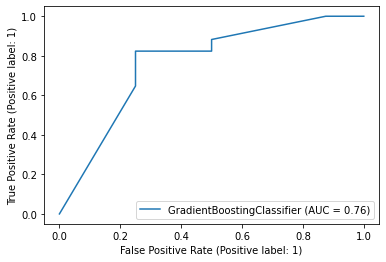

In [158]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection

x,y = datasets.make_classification (random_state = 49)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state = 49)

df = GradientBoostingClassifier(random_state = 49)

df.fit(x_train, y_train)

metrics.plot_roc_curve(df, x_test, y_test)

plt.show()

In [159]:
import joblib

# Assuming you have trained and assigned a model to the 'Region' variable
model = Region

# Save the model as .pkl
joblib.dump(model, "Region.pkl")

['Region.pkl']